# 아이리스 데이터 군집분석

In [1]:
from sklearn.cluster import KMeans
from sklearn import cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

## 1. 데이터셋 불러오기

In [8]:
iris = datasets.load_iris()
data = iris.data

print('data shape:', data.shape)
print('column names:\n',iris.feature_names)

data shape: (150, 4)
column names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 2. K-means(비계층형 클러스터) 모델링

In [9]:
# 비계층형 클러스터 생성(K-means)

model = KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [16]:
# 학습결과 라벨 취득(군집확인)
labels = model.labels_ # model.predict(data)와 동일
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [25]:
# 타겟값과 비교
iris.target == labels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

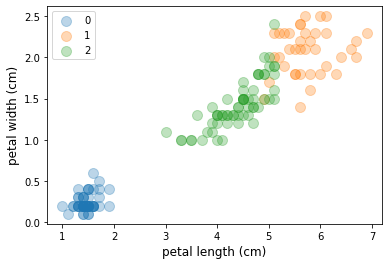

In [24]:
# 그래프 그리기
# petal length와 petal width의 모델군집간 차이

ldata = data[labels==0]
plt.scatter(ldata[:,2], ldata[:,3], alpha=0.3, s=100, label=0)

ldata = data[labels==1]
plt.scatter(ldata[:,2], ldata[:,3], alpha=0.3, s=100, label=1)

ldata = data[labels==2]
plt.scatter(ldata[:,2], ldata[:,3], alpha=0.3, s=100, label=2)

plt.xlabel(iris.feature_names[2], fontsize='large')
plt.ylabel(iris.feature_names[3], fontsize='large')
plt.legend()
plt.show()

## 3. 계층형 클러스터 모델링

In [28]:
# 계층형 클러스터 생성

model_agg = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward') # 와드법
model_agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [29]:
# 학습결과 라벨 취득(군집확인)
labels = model_agg.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [31]:
iris.target==labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

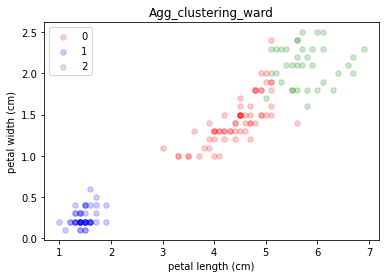

In [39]:
# 그래프 그리기
# petal length와 petal width의 모델군집간 차이
x_index=2
y_index=3
data_x = data[:,x_index]
data_y = data[:,y_index]
x_label = iris.feature_names[x_index]
y_label = iris.feature_names[y_index]

plt.scatter(data_x[labels==0], data_y[labels==0], color='red', 
            alpha=0.2, s=30, marker='o', label=0)
plt.scatter(data_x[labels==1], data_y[labels==1], color='blue', 
            alpha=0.2, s=30, marker='o', label=1)
plt.scatter(data_x[labels==2], data_y[labels==2], color='green', 
            alpha=0.2, s=30, marker='o', label=2)

plt.title('Agg_clustering_ward', fontsize='large')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

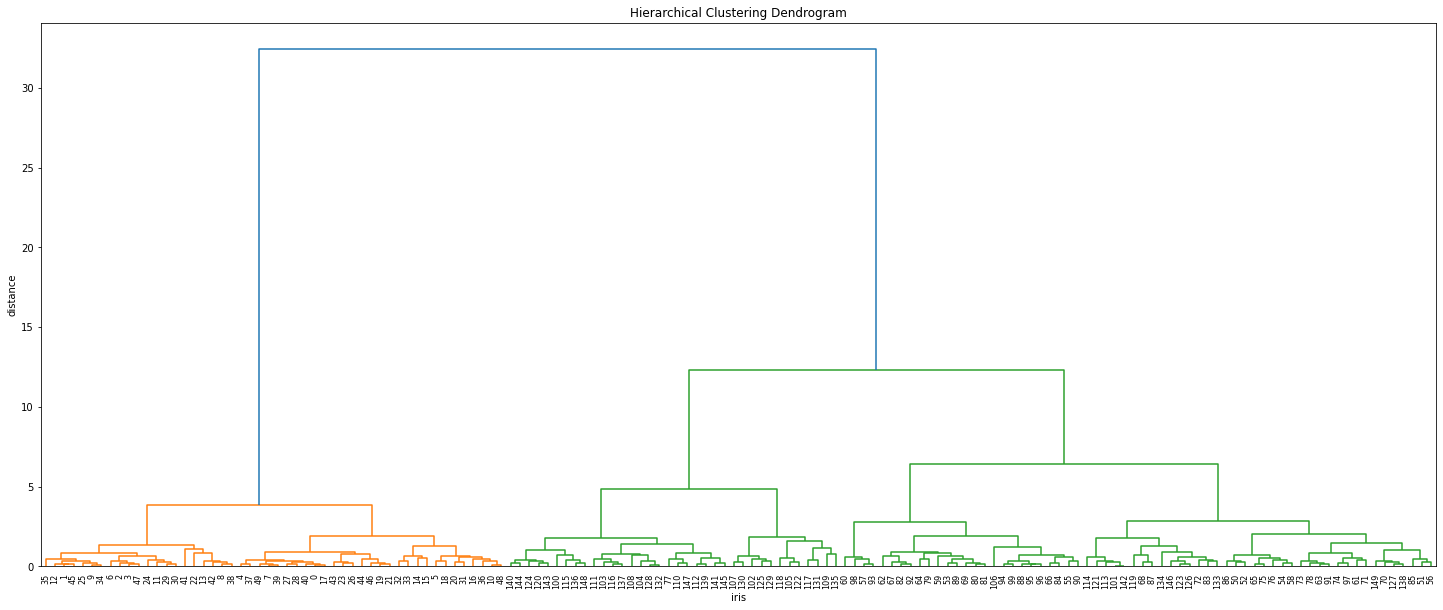

In [42]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(data, 'ward')

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')

dendrogram(z,
          leaf_rotation=90, # rotation x axis
          leaf_font_size=8)
plt.show()